In [1]:
import os
import sys
import torch
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = 'your_openai_api_key'

In [3]:
from PIL import Image
from IPython.core.display import HTML
from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.action import PROMPT

c:\Users\mehal\anaconda3\envs\genaiproj\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
torch.cuda.empty_cache()
interpreter = ProgramInterpreter(dataset='storygen')

Registering SEG step


c:\Users\mehal\anaconda3\envs\genaiproj\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\mehal\anaconda3\envs\genaiproj\lib\site-packages\transformers\models\maskformer\feature_extraction_maskformer.py:28: FutureWarning: The class MaskFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MaskFormerImageProcessor instead.
  warnings.warn(
c:\Users\mehal\anaconda3\envs\genaiproj\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:403: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
c:\Users\mehal\anaconda3\envs\genaiproj\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:410: 

Registering SELECT step
Registering REPLACE step


Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 5813.62it/s]
Keyword arguments {'generator': <torch._C.Generator object at 0x000001CF3FF30670>} are not expected by StableDiffusionInpaintPipeline and will be ignored.
c:\Users\mehal\anaconda3\envs\genaiproj\lib\site-packages\diffusers\models\modeling_utils.py:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend 

Registering BGBLUR step
Registering EMOJI step
Registering RESULT step
Registering STORYIMG step
Registering REMOVE step


Fetching 13 files: 100%|██████████| 13/13 [00:00<?, ?it/s]


Registering STORYTEXT step


In [5]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction)

generator = ProgramGenerator(prompter=create_prompt)

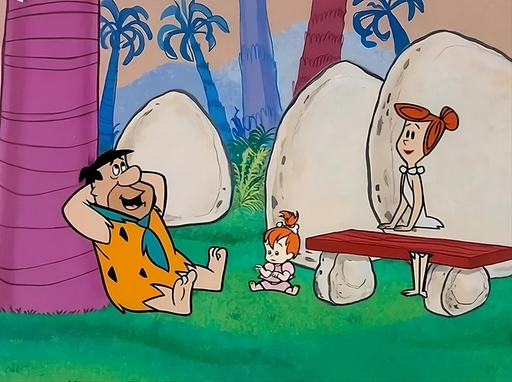

In [6]:
image = Image.open('../assets/fred_baby_lady_enhanced.png')#.resize((512,512))
image.thumbnail((512,512),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB'),
)
image

In [7]:
prog="""IMAGE0=STORYIMG(image=IMAGE, src_prompt='Fred, jenny and the baby are talking in the woods', target_prompt='Fred, jenny and the baby are eating in the woods', seed = 7, w1 = 1)
FINAL_RESULT=RESULT(var=IMAGE0)"""

In [ ]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
result

In [ ]:
# IMAGE3=STORYIMG(image=IMAGE, src_prompt='Fred, jenny and the baby are talking in the woods', target_prompt='Fred, jenny and the baby are eating in the woods', seed = 7, w1 = 1)
# IMAGE4=STORYIMG(image=IMAGE3, scr_prompt='Fred, jenny and the baby are eating in the woods', target_prompt='Fred, jenny and the baby getting attacked by scary crows in the woods', seed = 2, w1 = 1)
# IMAGE5=STORYIMG(image=IMAGE4, scr_prompt='Fred, jenny and the baby getting attacked by scary crows in the woods', target_prompt='Fred, jenny and the baby are running away from the crows in the woods', seed = 12397, w1 = 1.2)

In [ ]:
# story = "Fred is standing by the kitchen counter, unpacking groceries from a bag, with an apple partially visible at the top. He reaches into the grocery bag and takes out an apple, holding it in his hand. He places the apple on the kitchen table near the center, while the grocery bag remains on the counter. Fred picks up a knife from the table to grasp its handle, leaning slightly forward. He slices the apple into small, even pieces with the knife, as a few slices scatter on the table."
# story = "Fred is standing in a cozy, well-lit kitchen with warm wooden cabinets, unpacking groceries from a slightly crumpled paper bag placed on the counter, with visible items such as apples, bread, and canned goods partially spilling out. As Fred continues unpacking, his hand accidentally breaks through the side of the grocery bag, tearing the paper, causing a few items to drop onto the counter and floor, while he looks surprised and slightly frustrated. Fred suddenly turns his head towards the kitchen window, drawn by an intriguing smell wafting in, with his expression shifting to one of curiosity and his body slightly angled towards the source.  Fred is engaged in an animated conversation with Barney through the window, gesturing lightly with one hand while smiling, as Barney, visible outside, responds enthusiastically with a friendly expression."
story = "Fred reached into the grocery bag, his hand breaking through the thin paper as he grabbed a loaf of bread from the bottom. Make Fred turn towards the window as the scent of sizzling bacon and smoky wood smoke filled the kitchen air. Make Fred Fred look outside, spotting Barney leaning casually on the wooden fence, waving with a grin while flipping a spatula. Make Fred take a step closer to the window, trying to hear Barney's voice over the gentle rustle of leaves and distant birds chirping. Fred raised his hand in greeting as Barney spoke, the two of them sharing a moment of casual banter under the golden afternoon sun."
instruction = f"Visualize this story: {story}."
prog = generator.generate(instruction)
print(prog)

In [ ]:
story = "Fred, Jenny, and baby John are sitting in the woods. Fred is daydreaming about curry rice. Jenny brings out delicious food and they are eating. A raven stoops down for the food. Fred, Jenny and baby John run away."
instruction = f"Visualize this story: {story}."

In [7]:
prog="""TEXT=STORYTEXT(query='Fred, Jenny, and baby John are sitting in the woods. Fred is daydreaming about curry rice. Jenny brings out delicious food and they are eating. A raven stoops down for the food. Fred, Jenny and baby John run away.')
RESULT=RESULT(var=TEXT)"""

In [8]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
result

TEXT=STORYTEXT(query='Fred, Jenny, and baby John are sitting in the woods. Fred is daydreaming about curry rice. Jenny brings out delicious food and they are eating. A raven stoops down for the food. Fred, Jenny and baby John run away.')
STORYTEXT
Fred, Jenny, and baby John are sitting in the woods. Fred is daydreaming about curry rice. Jenny brings out delicious food and they are eating. A raven stoops down for the food. Fred, Jenny and baby John run away.
{
  "finish_reason": "stop",
  "index": 0,
  "logprobs": {
    "content": [
      {
        "bytes": [
          70,
          114,
          101,
          100
        ],
        "logprob": -0.83488697,
        "token": "Fred",
        "top_logprobs": []
      },
      {
        "bytes": [
          44
        ],
        "logprob": -0.00023286081,
        "token": ",",
        "top_logprobs": []
      },
      {
        "bytes": [
          32,
          74,
          101,
          110,
          110,
          121
        ],
    

'Fred, Jenny, and baby John were enjoying a peaceful picnic in the woods. As Fred daydreamed about curry rice, Jenny revealed a spread of delicious food. Suddenly, a raven swooped down, eyeing their meal. Startled, the family quickly packed up and ran, leaving their peaceful picnic behind.'

In [9]:
HTML(html_str)

In [12]:
prog = """OBJ0=SEG(image=IMAGE)
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='man on the left',category=None)
IMAGE0=BGBLUR(image=IMAGE, object=OBJ1)
IMAGE1=EMOJI(image=IMAGE0,object=OBJ1,emoji='cloud')
OBJ2=SEG(image=IMAGE1)
OBJ3=SELECT(image=IMAGE1,object=OBJ2, query='cloud',category=None)
IMAGE2=EMOJI(image=IMAGE1,object=OBJ3,emoji='curry_rice')
IMAGE3=STORYIMG(image=IMAGE, src_prompt='Fred, jenny and the baby are talking in the woods', target_prompt='Fred, jenny and the baby are eating in the woods', seed = 7, w1 = 1)
IMAGE4=STORYIMG(image=IMAGE3, src_prompt='Fred, jenny and the baby are eating in the woods', target_prompt='Fred, jenny and the baby getting attacked by scary crows in the woods', seed = 2, w1 = 1)
IMAGE5=STORYIMG(image=IMAGE4, src_prompt='Fred, jenny and the baby getting attacked by scary crows in the woods', target_prompt='Fred, jenny and the baby are running away from the crows in the woods', seed = 12397, w1 = 1.2)
STORY = STORYTEXT(story_text=""Fred, Jenny, and baby John are sitting in the woods. Fred is daydreaming about curry rice. Jenny brings out delicious food and they are eating. A raven stoops down for the food. Fred, Jenny and baby John run away.")
STORY_TEXT_RESULT = RESULT(var=STORY)
FINAL_RESULT=RESULT(var=IMAGE5)"""

In [13]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
result

OBJ0=SEG(image=IMAGE)
SEG


`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='man on the left',category=None)
SELECT
IMAGE0=BGBLUR(image=IMAGE, object=OBJ1)
BGBLUR
IMAGE1=EMOJI(image=IMAGE0,object=OBJ1,emoji='cloud')
EMOJI
OBJ2=SEG(image=IMAGE1)
SEG


`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])
OBJ3=SELECT(image=IMAGE1,object=OBJ2, query='cloud',category=None)
SELECT
IMAGE2=EMOJI(image=IMAGE1,object=OBJ3,emoji='curry_rice')
EMOJI
IMAGE3=STORYIMG(image=IMAGE, src_prompt='Fred, jenny and the baby are talking in the woods', target_prompt='Fred, jenny and the baby are eating in the woods', seed = 7, w1 = 1)
STORYIMG
seed: 7, w1: 1
Loaded as API: https://turboedit-turbo-edit.hf.space ✔
<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x1D182E575B0>
IMAGE4=STORYIMG(image=IMAGE3, src_prompt='Fred, jenny and the baby are eating in the woods', target_prompt='Fred, jenny and the baby getting attacked by scary crows in the woods', seed = 2, w1 = 1)
STORYIMG
seed: 2, w1: 1
Loaded as API: https://turboedit-turbo-edit.hf.space ✔
<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x1D182C74610>
IMAGE5=STORYIMG(image=IMAGE4, src_prompt='Fred, jenny and the baby getting attacked by scary crows in the woods', target_p

AppError: The upstream Gradio app has raised an exception: 'You have exceeded your GPU quota (54s left vs. 60s requested). <a href="https://huggingface.co/join">Sign-up on Hugging Face</a> to get more quotas or retry in 0:22:09'

SEG


`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])
SELECT
BGBLUR
EMOJI
SEG


`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])
SELECT
EMOJI
RESULT
IMAGE2


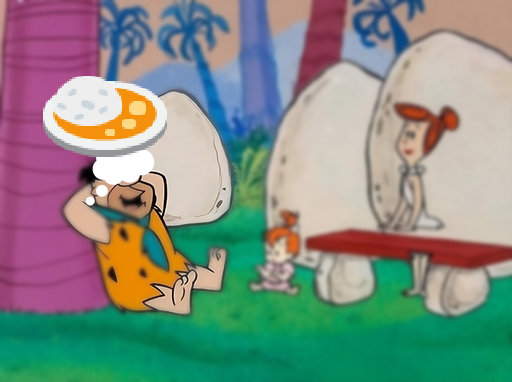

In [22]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
result


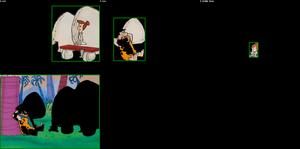
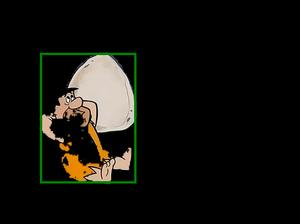
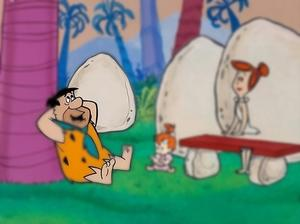
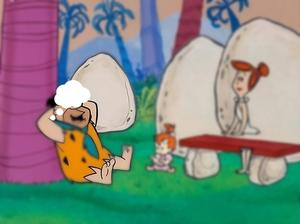
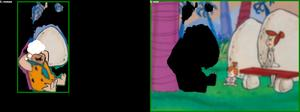
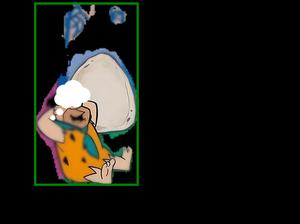
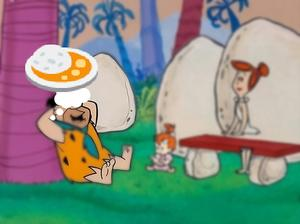
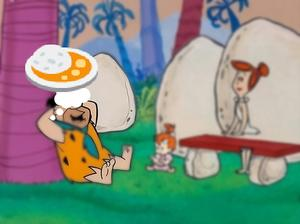

In [23]:
HTML(html_str)


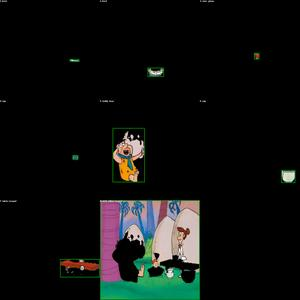
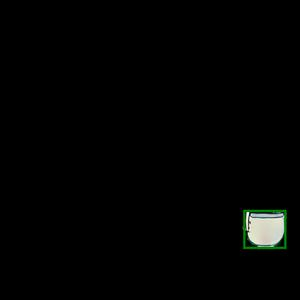
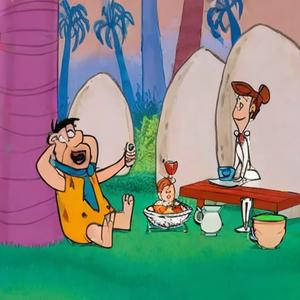
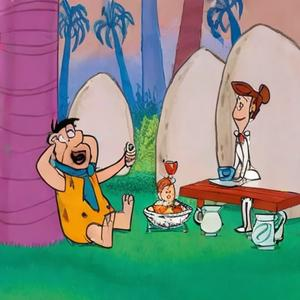
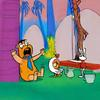
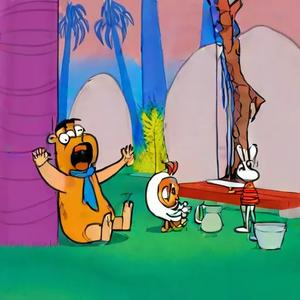

In [9]:
HTML(html_str)

In [ ]:
HTML(html_str)

In [ ]:

torch.manual_seed(200)
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
result

In [ ]:
HTML(html_str)

In [ ]:
torch.manual_seed(2)
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
result

In [ ]:
HTML(html_str)

In [ ]:
prog = """OBJ0=SEG(image=IMAGE)
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='man',category=None)
OBJ2=SELECT(image=IMAGE,object=OBJ0,query='mug',category=None)
IMAGE0 = BGBLUR(image=IMAGE,object=OBJ1)
IMAGE1=REPLACE(image=IMAGE0,object=OBJ2,prompt='phone',seed=200)
IMAGE2=STORYIMG(image=IMAGE1, src_prompt='Fred holds a phone', target_prompt='Fred calls using the phone', seed = 200, w1 = 1.5)
FINAL_RESULT=RESULT(var=IMAGE2)"""

In [ ]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
result

In [ ]:
HTML(html_str)

In [ ]:
source_prompt = "a white cat sleeping on a floating leaf"
target_prompt = "a dreamy bear sleeping on a floating leaf"
img_path = '../assets/catonleaf.png'
instruction = f"Visualize this story: {source_prompt}. {target_prompt}."
prog = generator.generate(instruction)
print(prog)